In [2]:
!nvidia-smi

Fri Nov  8 08:47:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [6]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/1.jpg' save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/1.jpg: 448x640 1 person, 1 tie, 1 cell phone, 77.6ms
Speed: 12.9ms preprocess, 77.6ms inference, 935.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [9]:
from ultralytics import YOLO
from PIL import Image
import requests
image='/content/1.jpg'
model = YOLO('yolo11n.pt')
result = model.predict('/content/1.jpg', conf=0.25)[0]


image 1/1 /content/1.jpg: 448x640 1 person, 1 tie, 1 cell phone, 81.7ms
Speed: 4.7ms preprocess, 81.7ms inference, 911.4ms postprocess per image at shape (1, 3, 448, 640)


In [10]:
result.boxes.xyxy

tensor([[111.9525,  44.0664, 411.6530, 355.3497],
        [220.0704, 144.1498, 243.5304, 181.0977],
        [378.4923, 176.8622, 456.4257, 219.8108]], device='cuda:0')

In [11]:
result.boxes.conf

tensor([0.9118, 0.4266, 0.3459], device='cuda:0')

In [12]:
result.boxes.cls

tensor([ 0., 27., 67.], device='cuda:0')

In [13]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

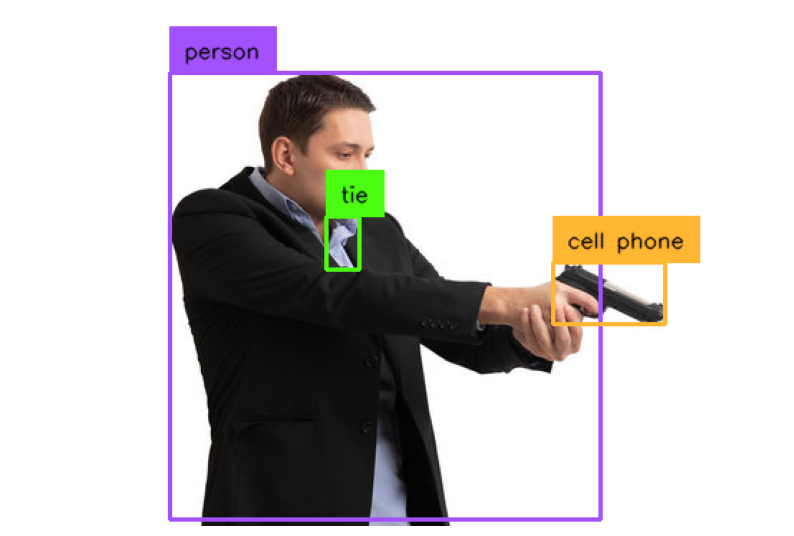

In [16]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

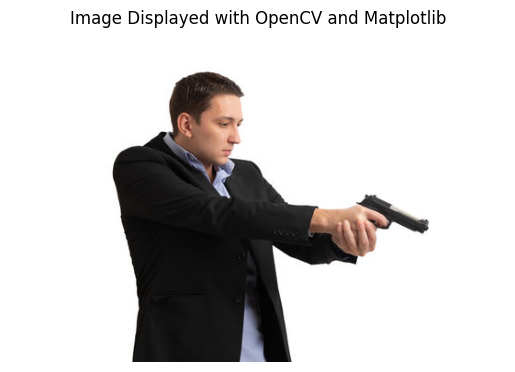

In [15]:
import cv2
from matplotlib import pyplot as plt

# Define the path to the image
image_path = '/content/1.jpg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (since OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis
plt.title("Image Displayed with OpenCV and Matplotlib")
plt.show()

In [17]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="c7H806AwcBQx20DaxDUR")
project = rf.workspace("crime-detection-kguy9").project("crime-detection-ehs3x")
version = project.version(1)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Crime-Detection-1 in yolov11:: 100%|██████████| 10310/10310 [00:03<00:00, 2787.96it/s]


In [18]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 322MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Crime-Detection-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

In [19]:

!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1731056159.00019fbb6521.2736.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


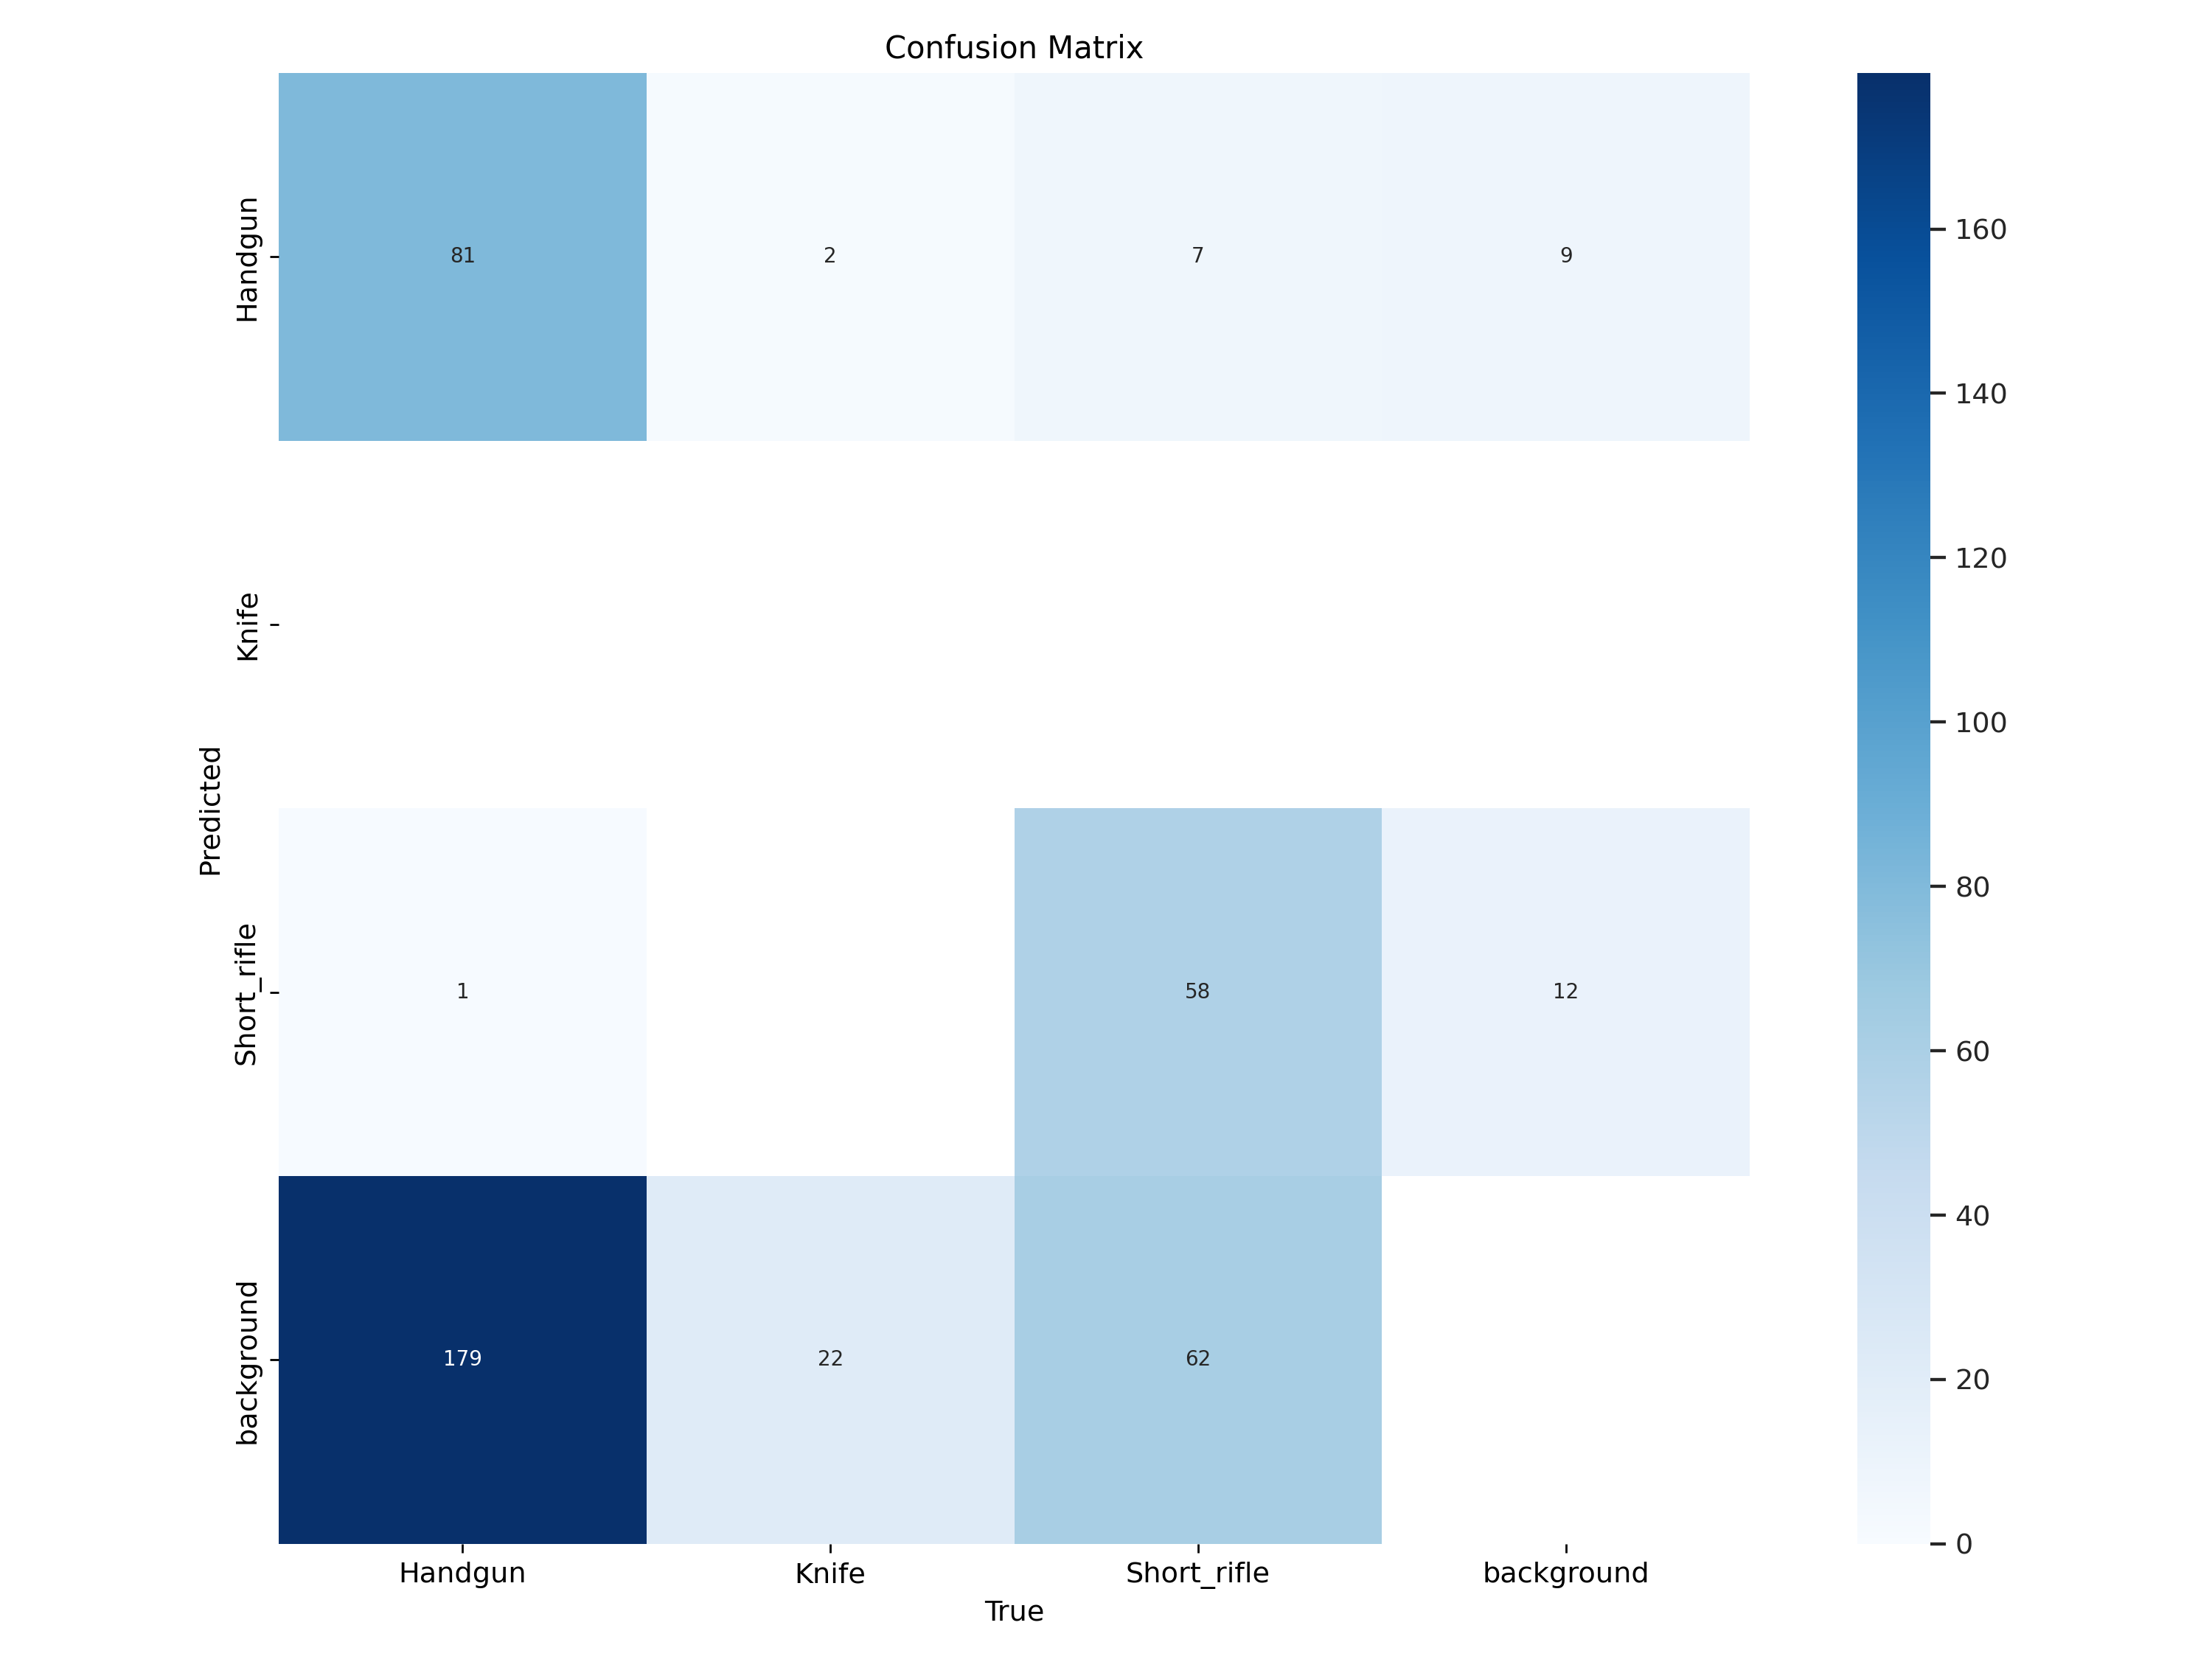

In [20]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

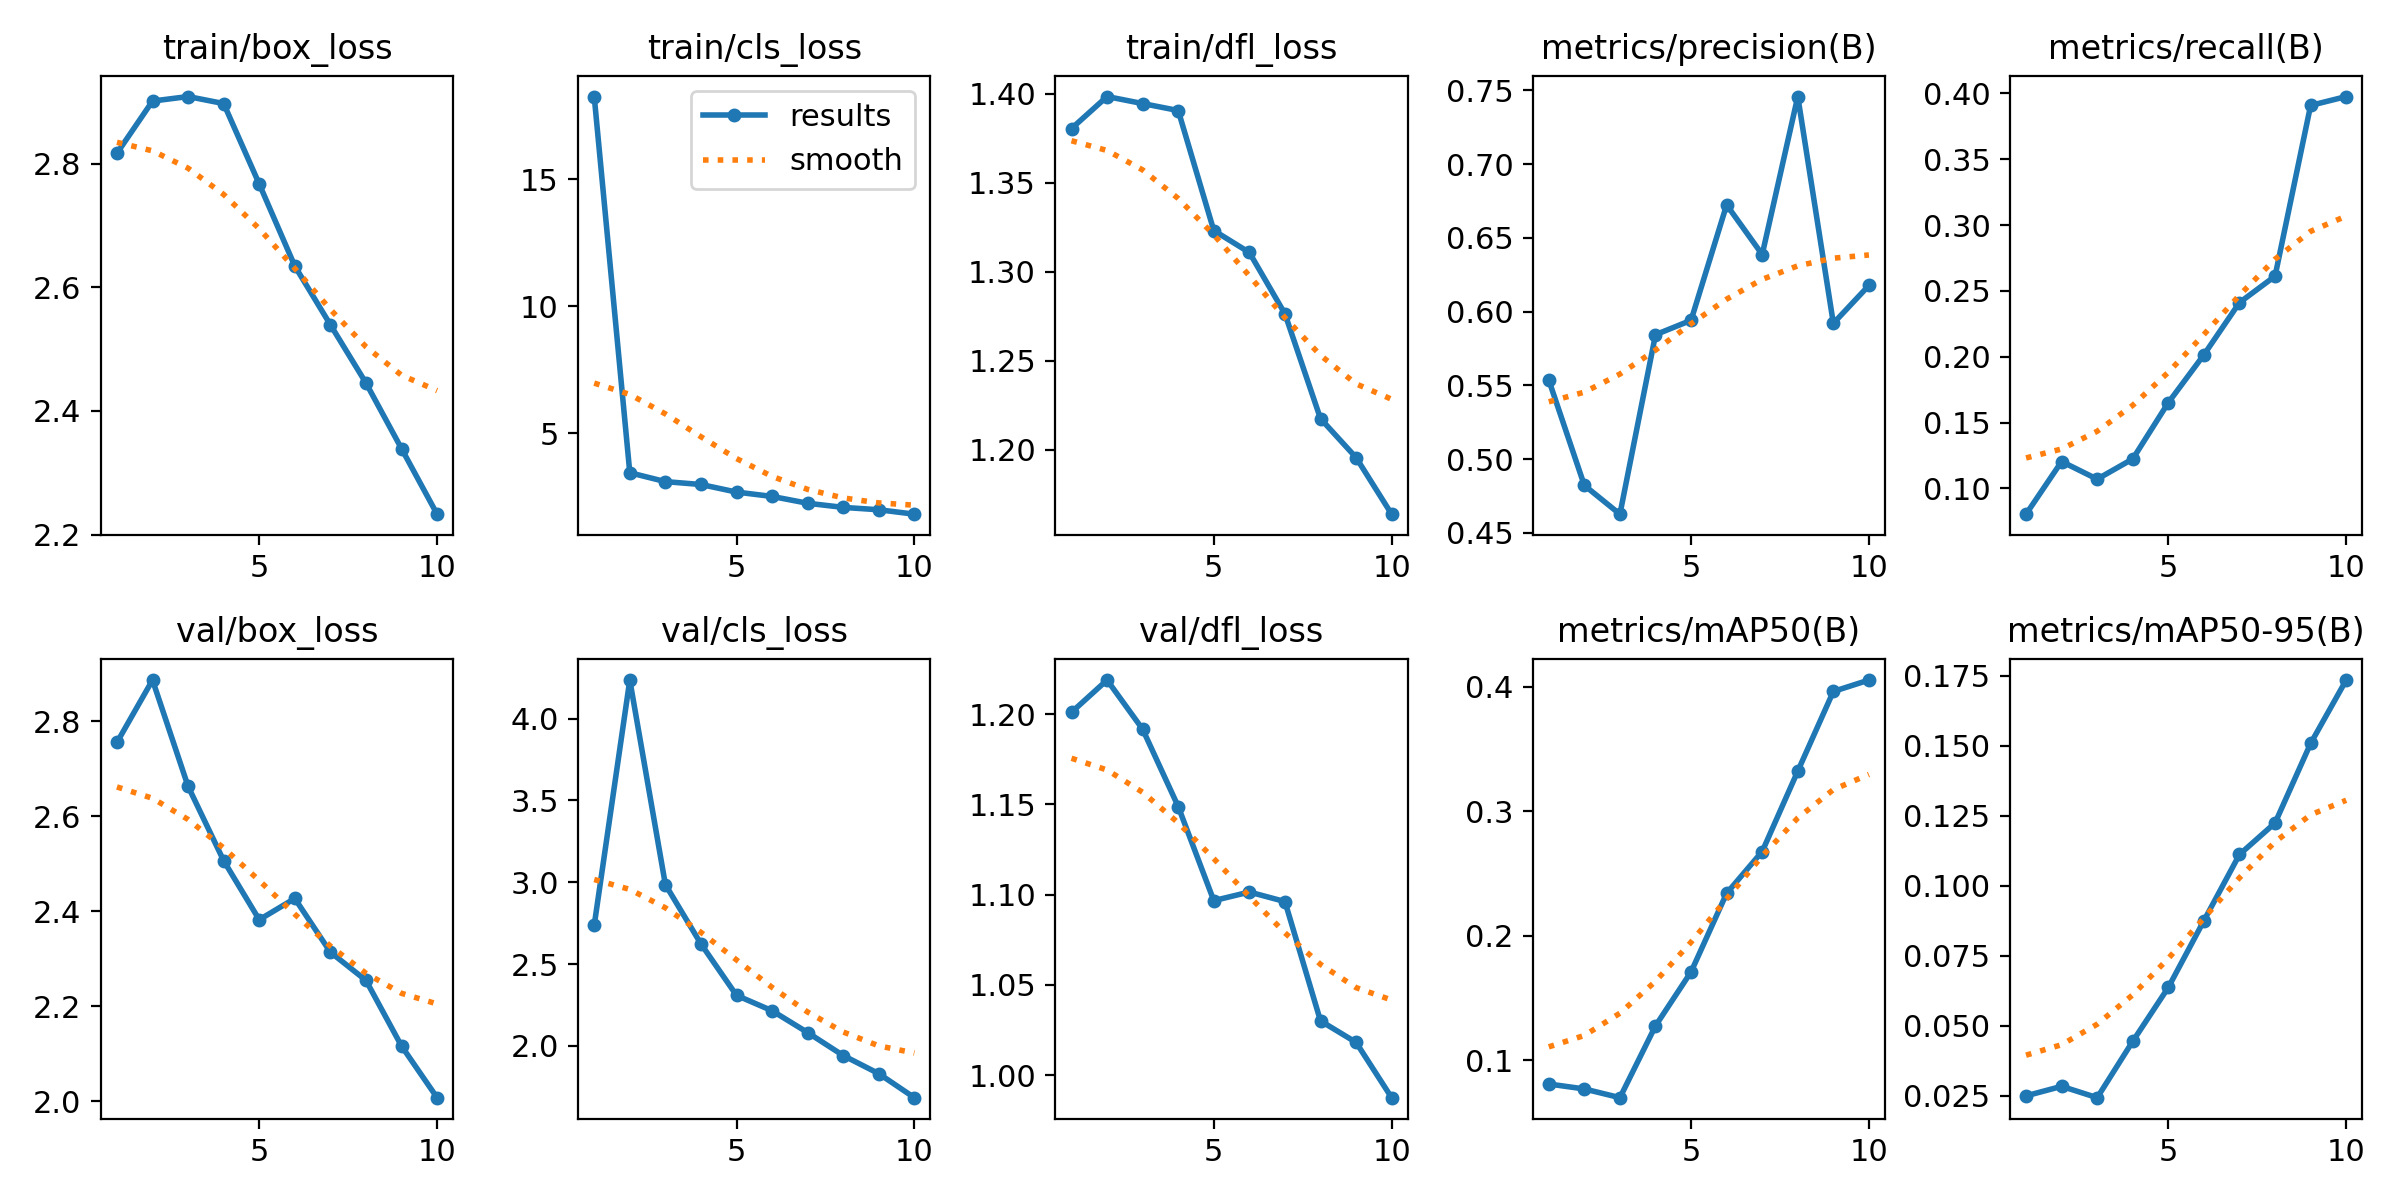

In [21]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

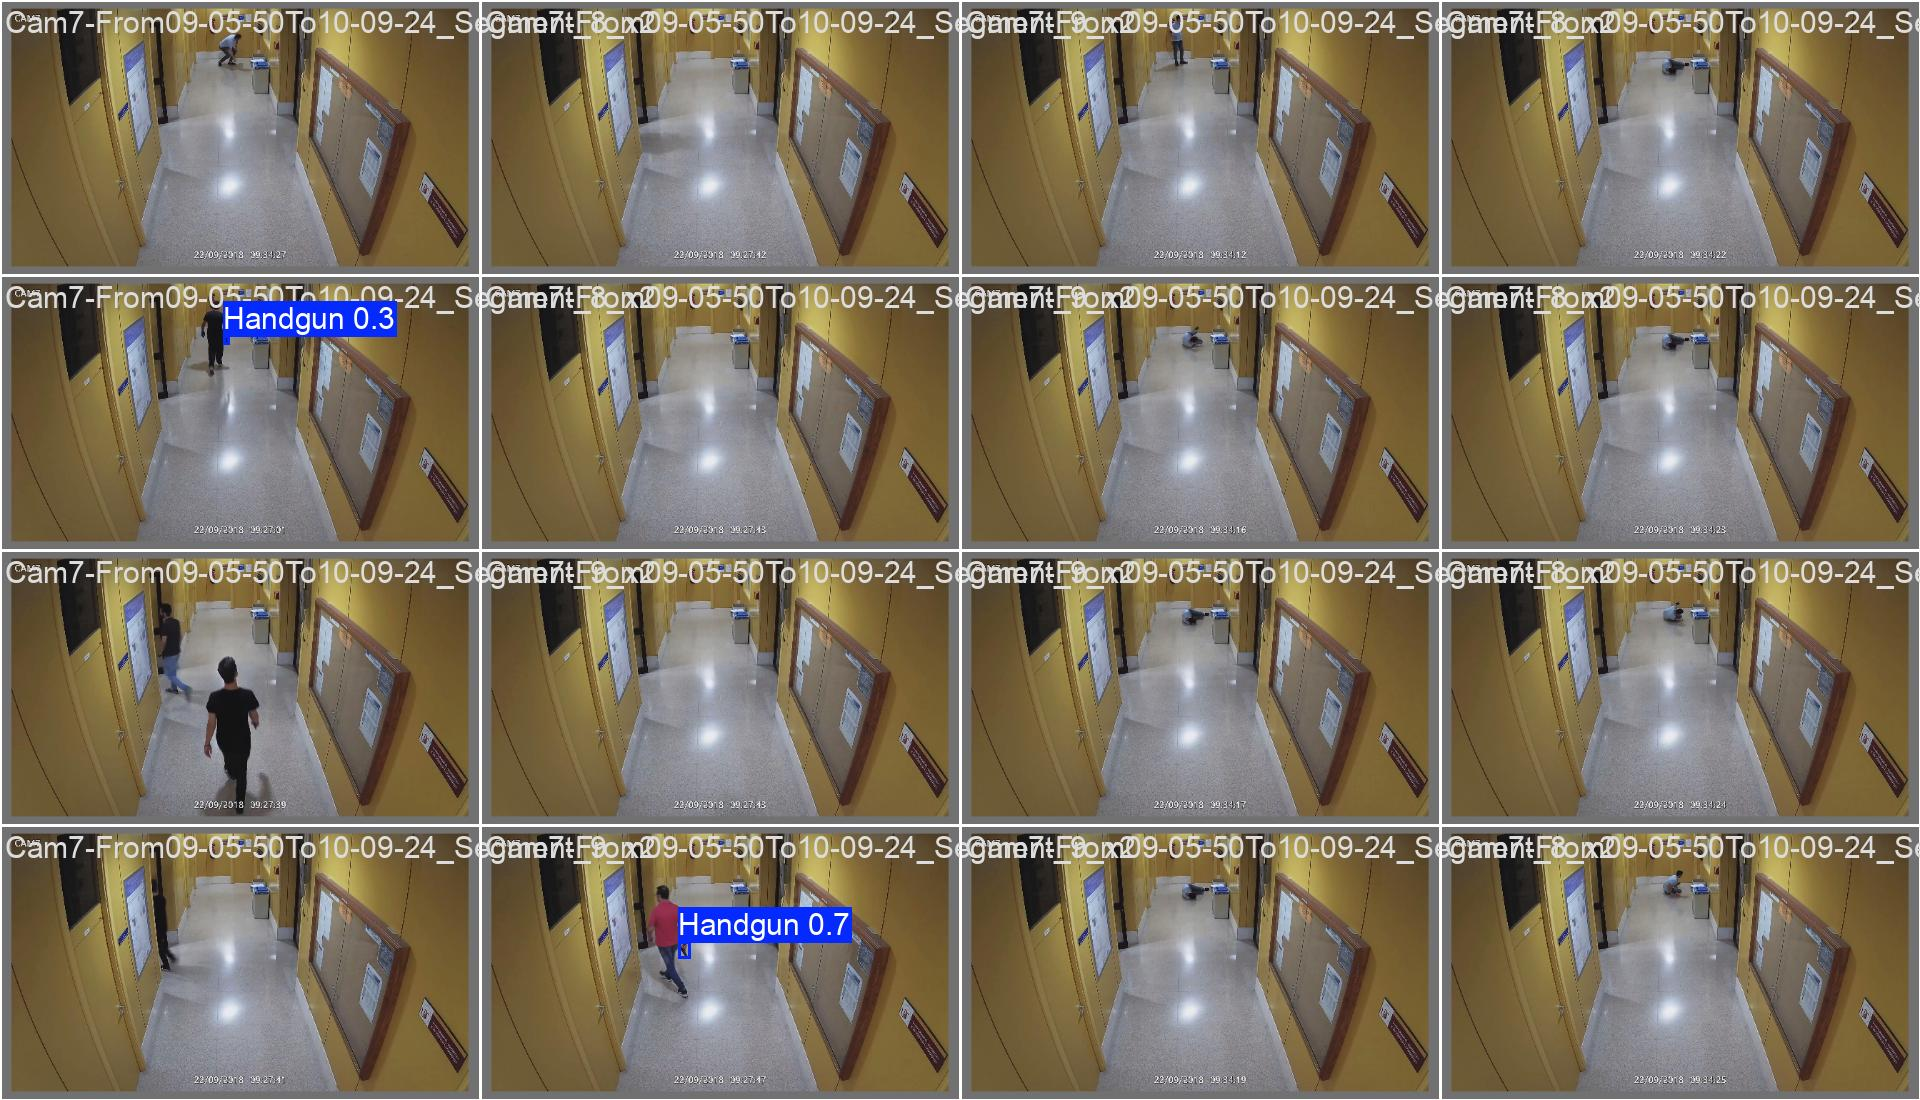

In [22]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [23]:

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Crime-Detection-1/valid/labels.cache... 772 images, 530 backgrounds, 0 corrupt: 100% 772/772 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 49/49 [00:10<00:00,  4.70it/s]
                   all        772        412      0.617      0.398      0.403      0.173
               Handgun        180        261      0.426      0.506      0.449      0.175
                 Knife         24         24          1      0.106      0.203     0.0743
           Short_rifle        109        127      0.425      0.583      0.556      0.271
Speed: 0.5ms preprocess, 5.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [24]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/360 /content/datasets/Crime-Detection-1/test/images/Cam1-From09-23-00To10-03-25_Segment_0_x264_frame_110_jpg.rf.6514f674ab7f118624e6703036a7d5b9.jpg: 384x640 (no detections), 48.2ms
image 2/360 /content/datasets/Crime-Detection-1/test/images/Cam1-From09-23-00To10-03-25_Segment_0_x264_frame_14_jpg.rf.5e298481b156518f91afbf8a41f8c8c4.jpg: 384x640 1 Handgun, 10.9ms
image 3/360 /content/datasets/Crime-Detection-1/test/images/Cam1-From09-23-00To10-03-25_Segment_0_x264_frame_16_jpg.rf.77bcb440d7bb5bf083de5b3a7dba4152.jpg: 384x640 2 Handguns, 10.9ms
image 4/360 /content/datasets/Crime-Detection-1/test/images/Cam1-From09-23-00To10-03-25_Segment_0_x264_frame_51_jpg.rf.ecfe4b24ffddd9bf759017e699757232.jpg: 384x640 1 Handgun, 10.8ms
image 5/360 /content/datasets/Crime-Detection-1/test/images/Cam1-From09-23-00To10-03-25_Segme

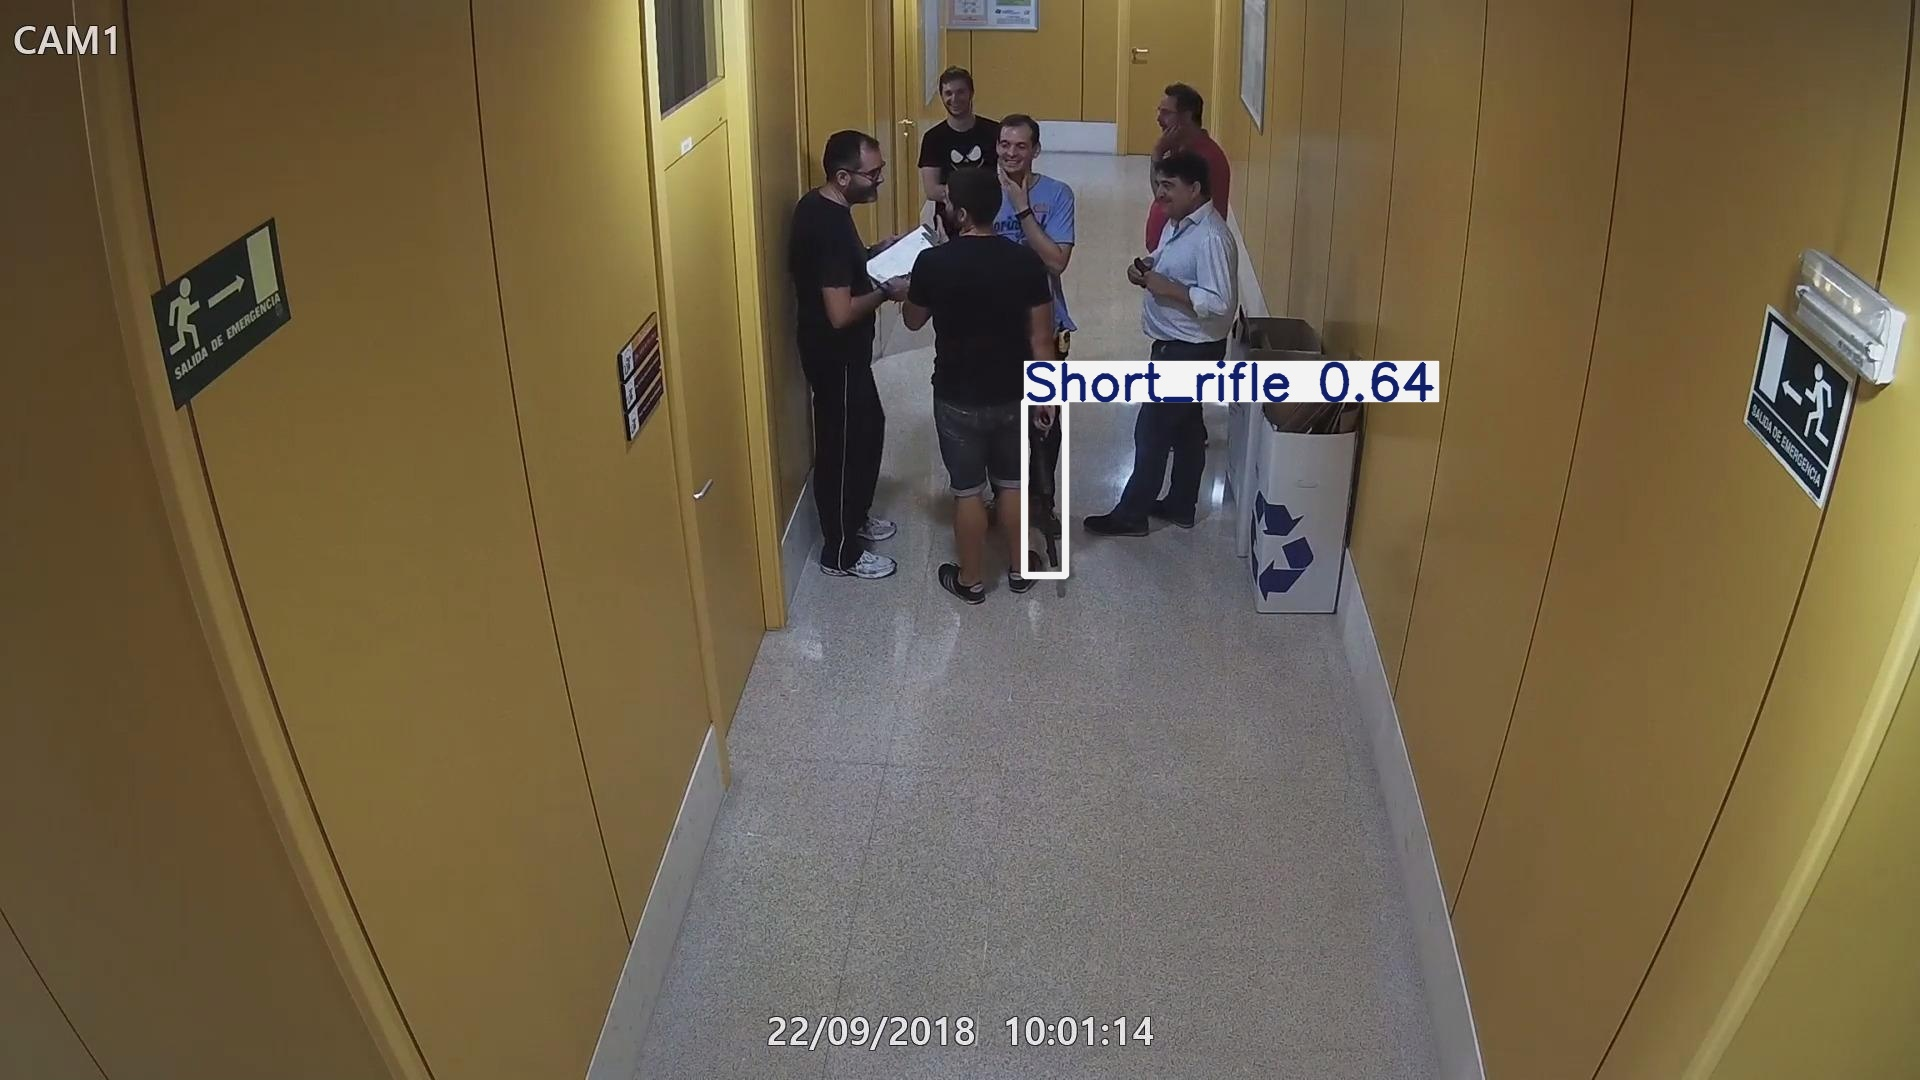

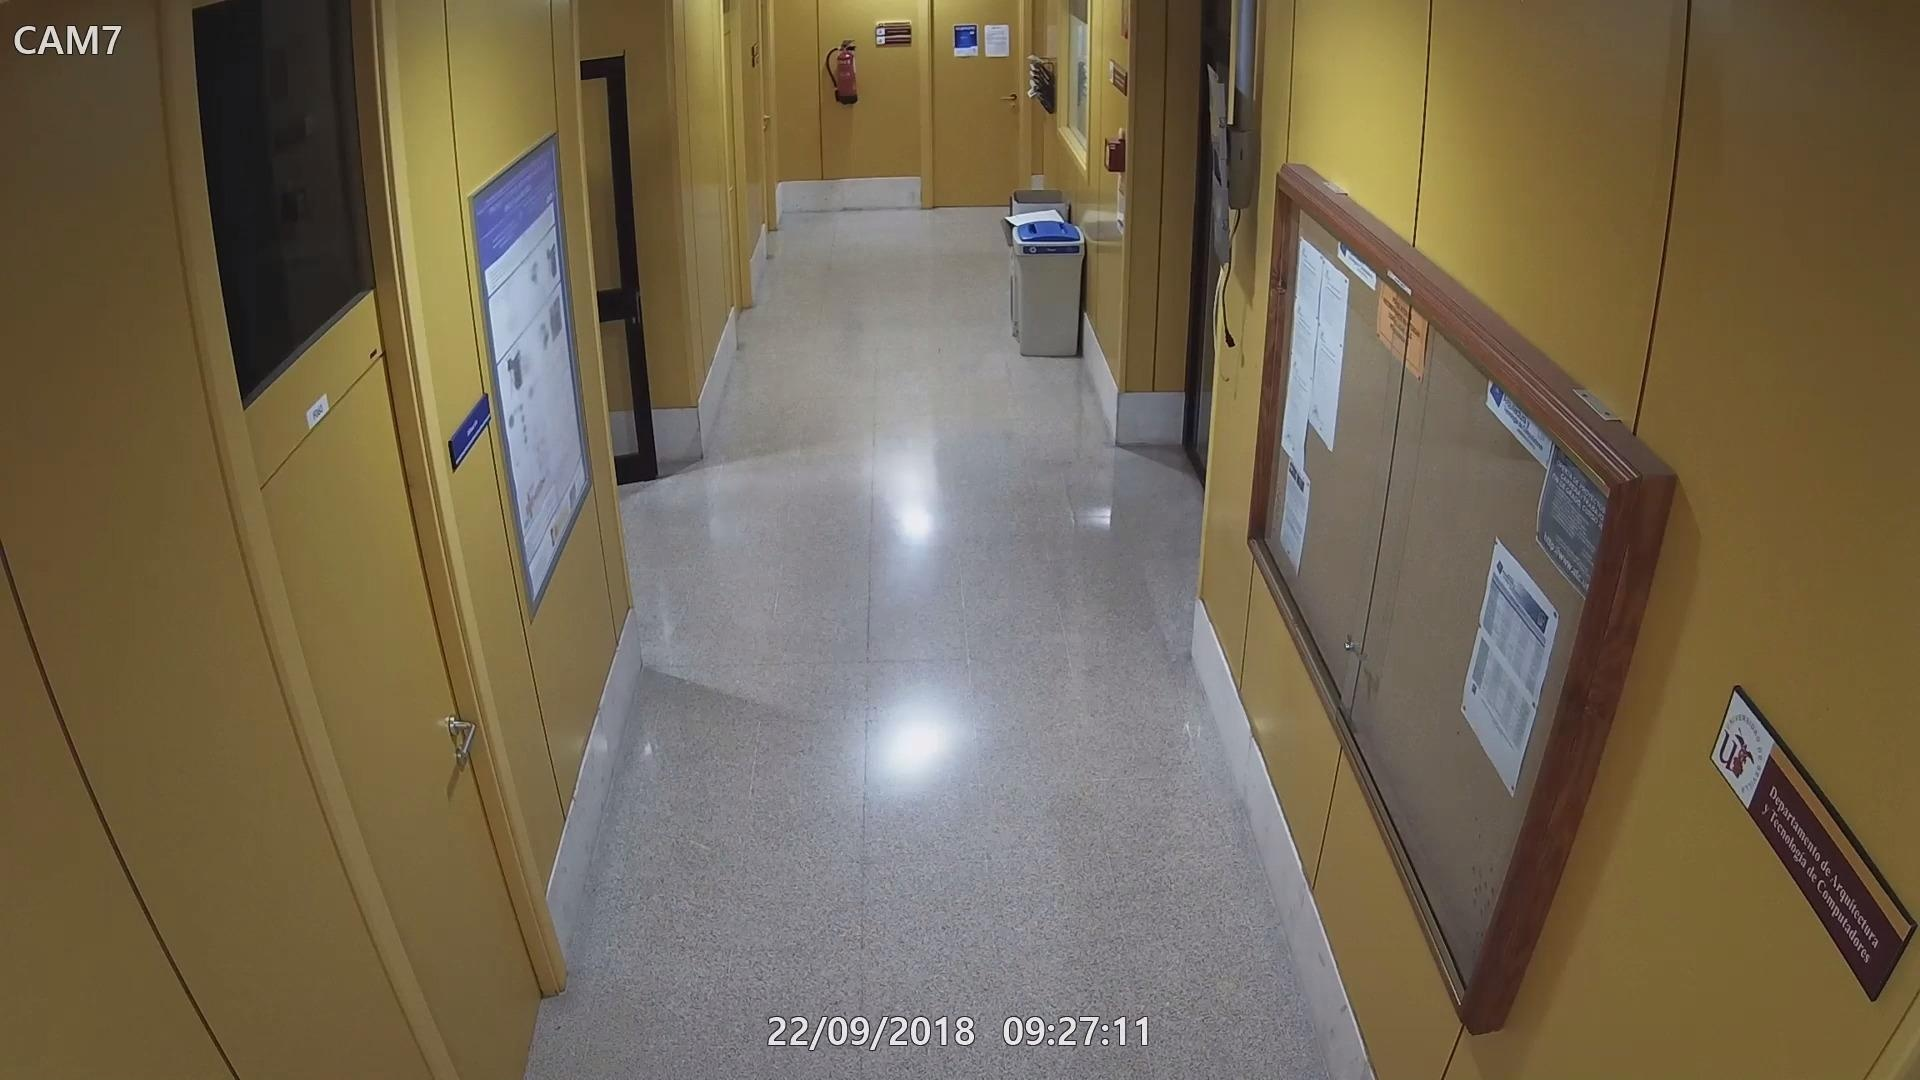

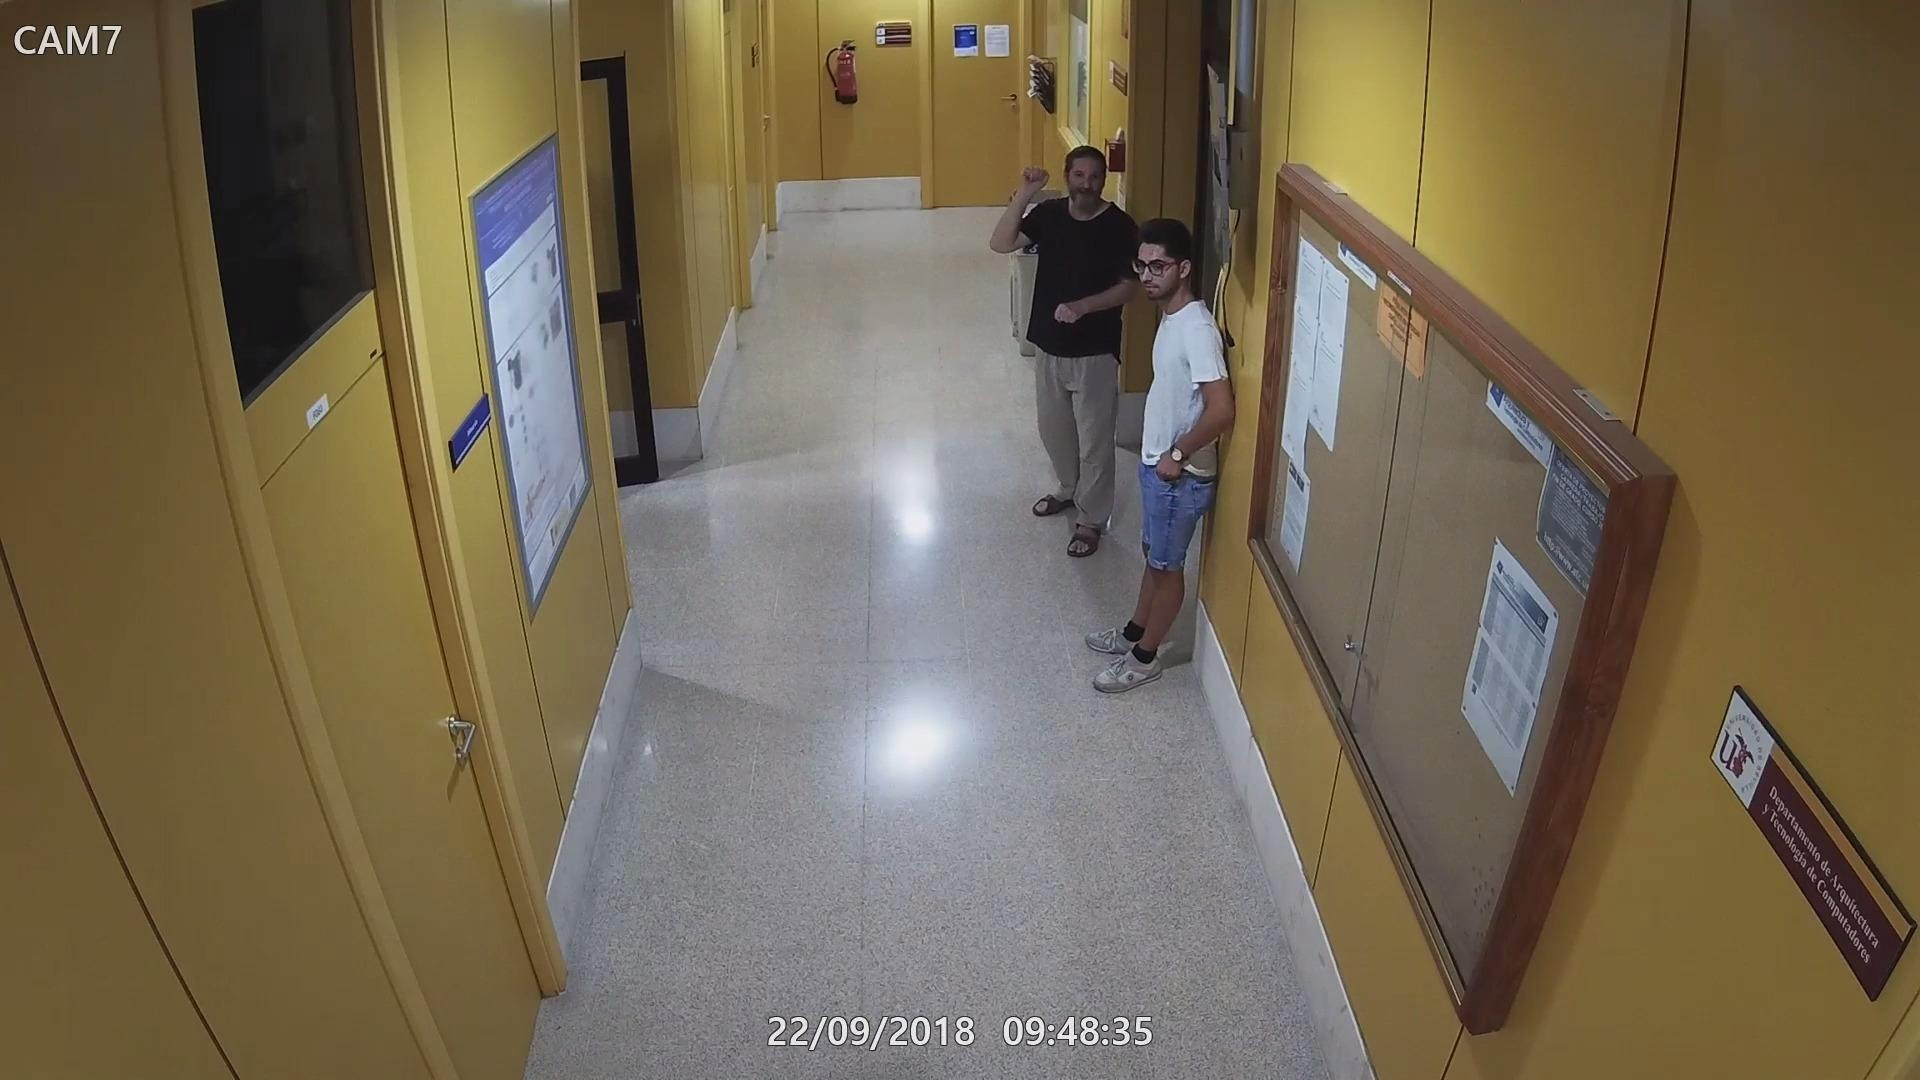

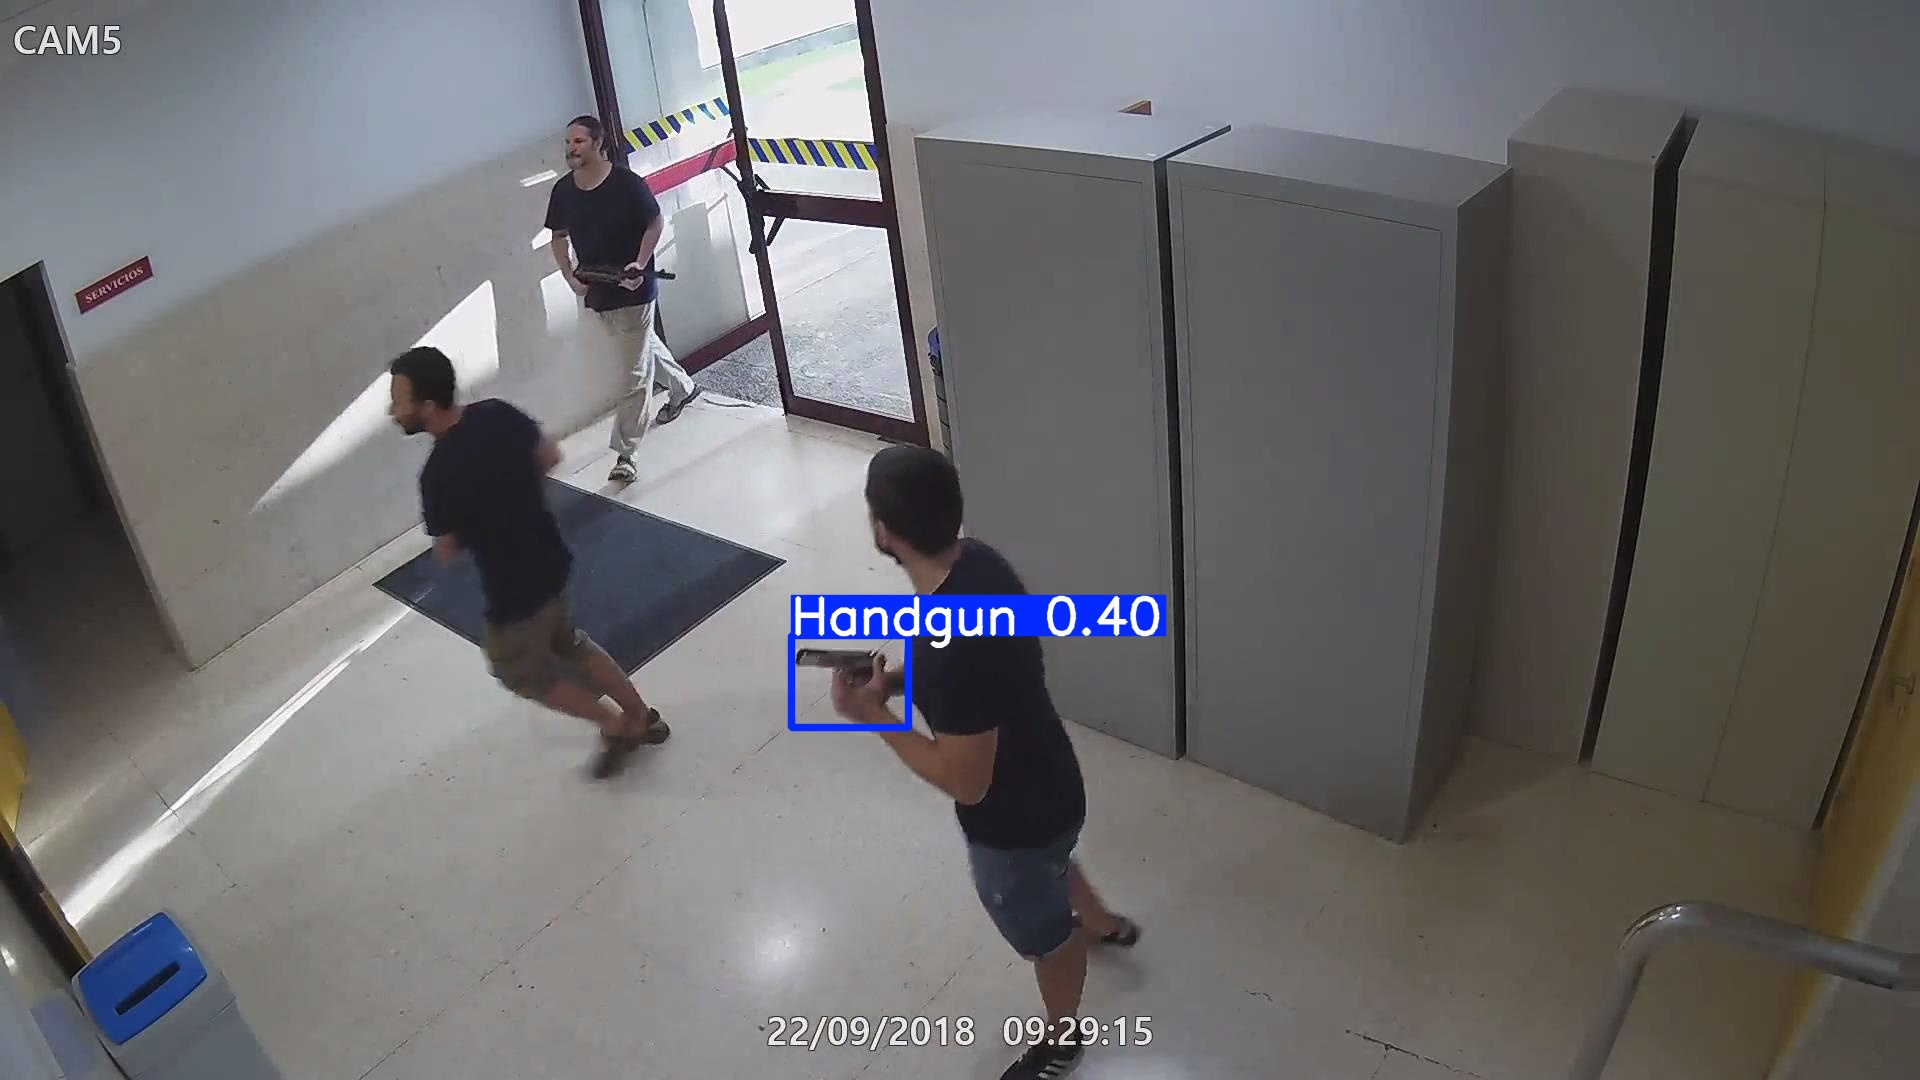

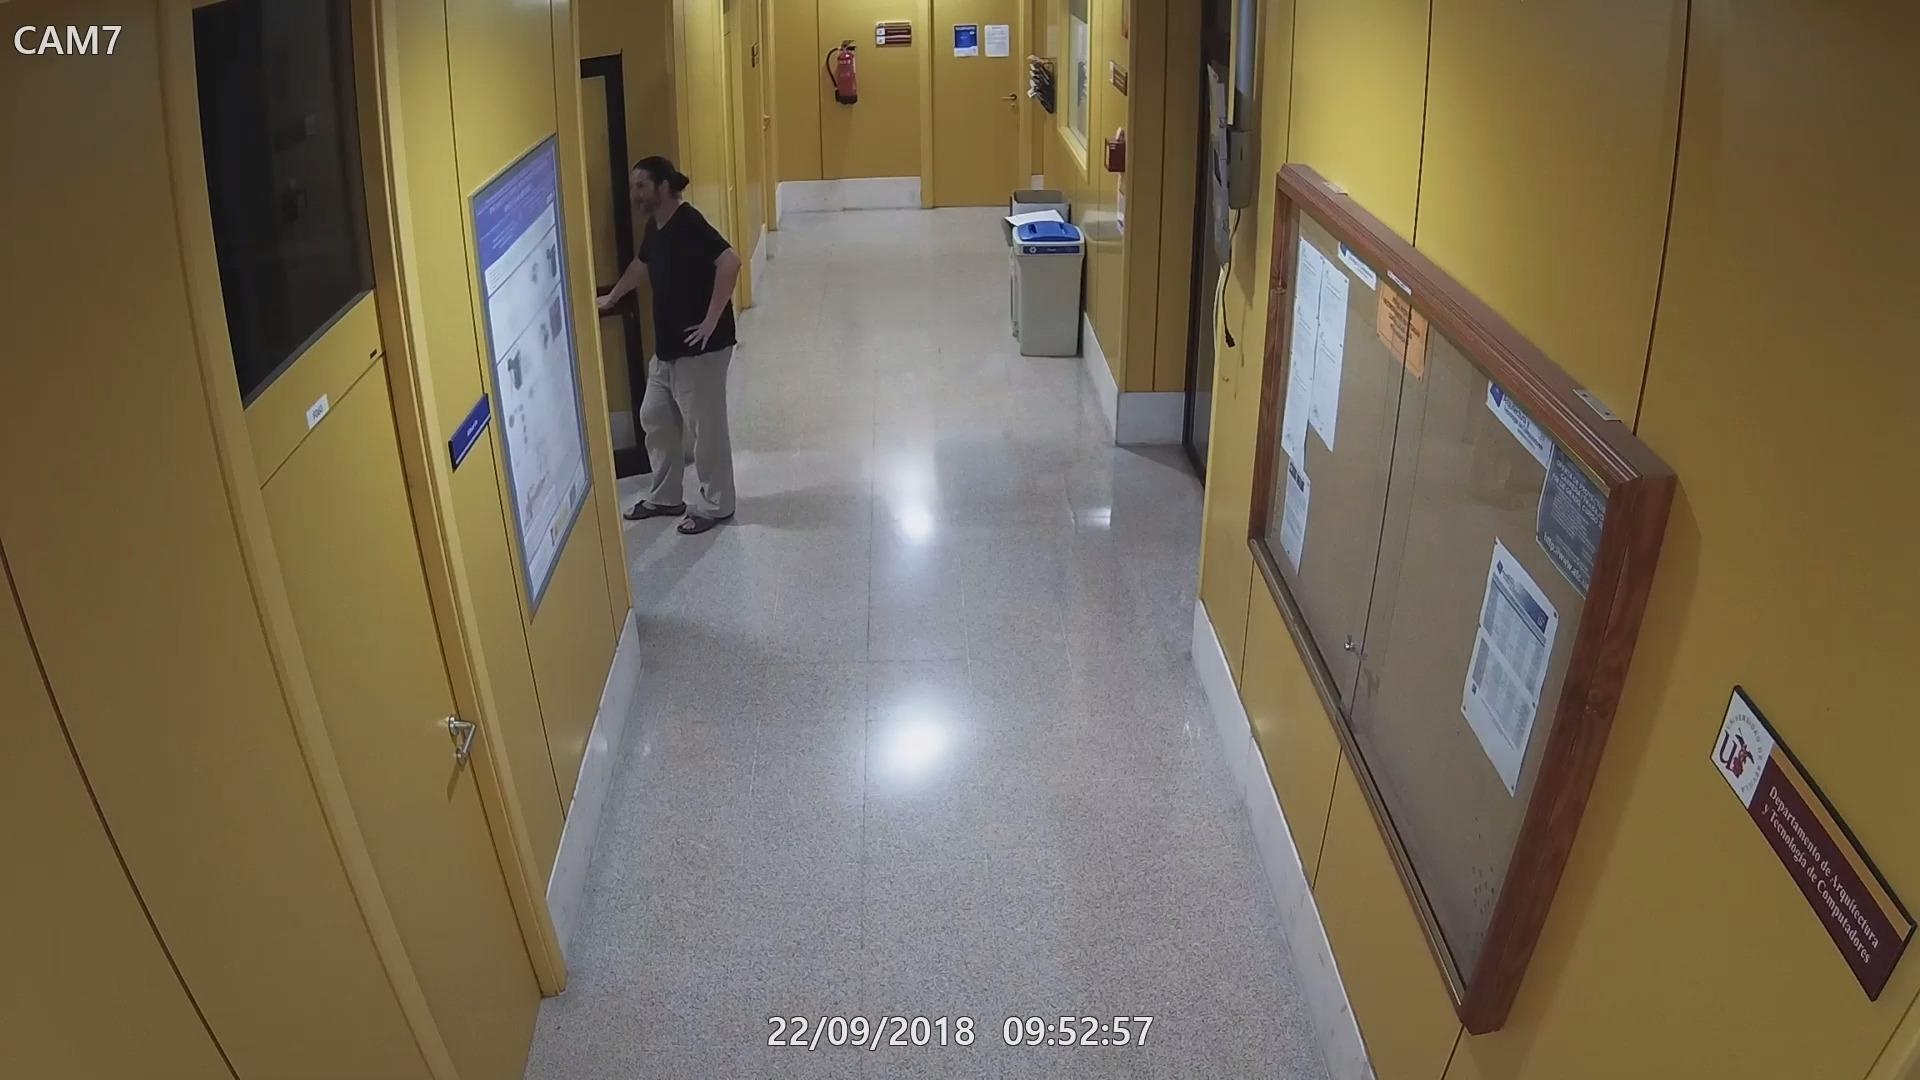

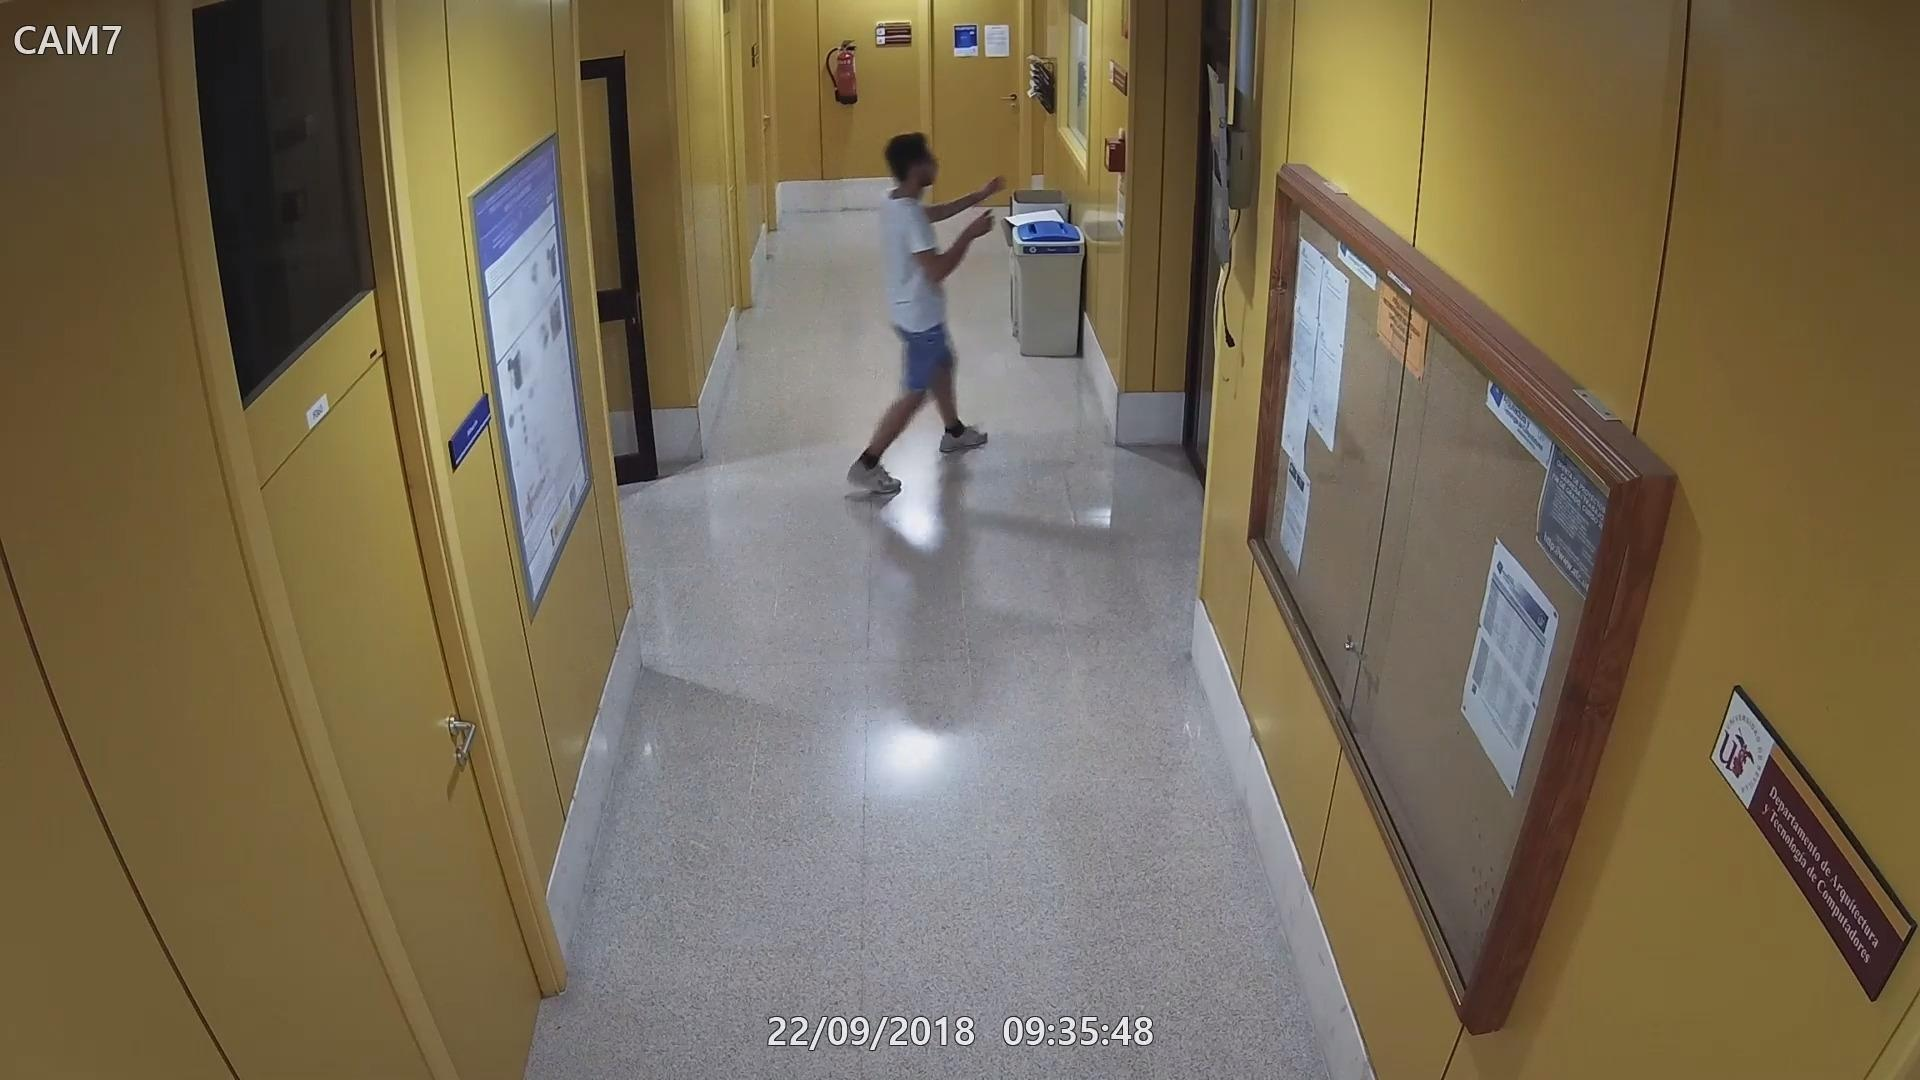

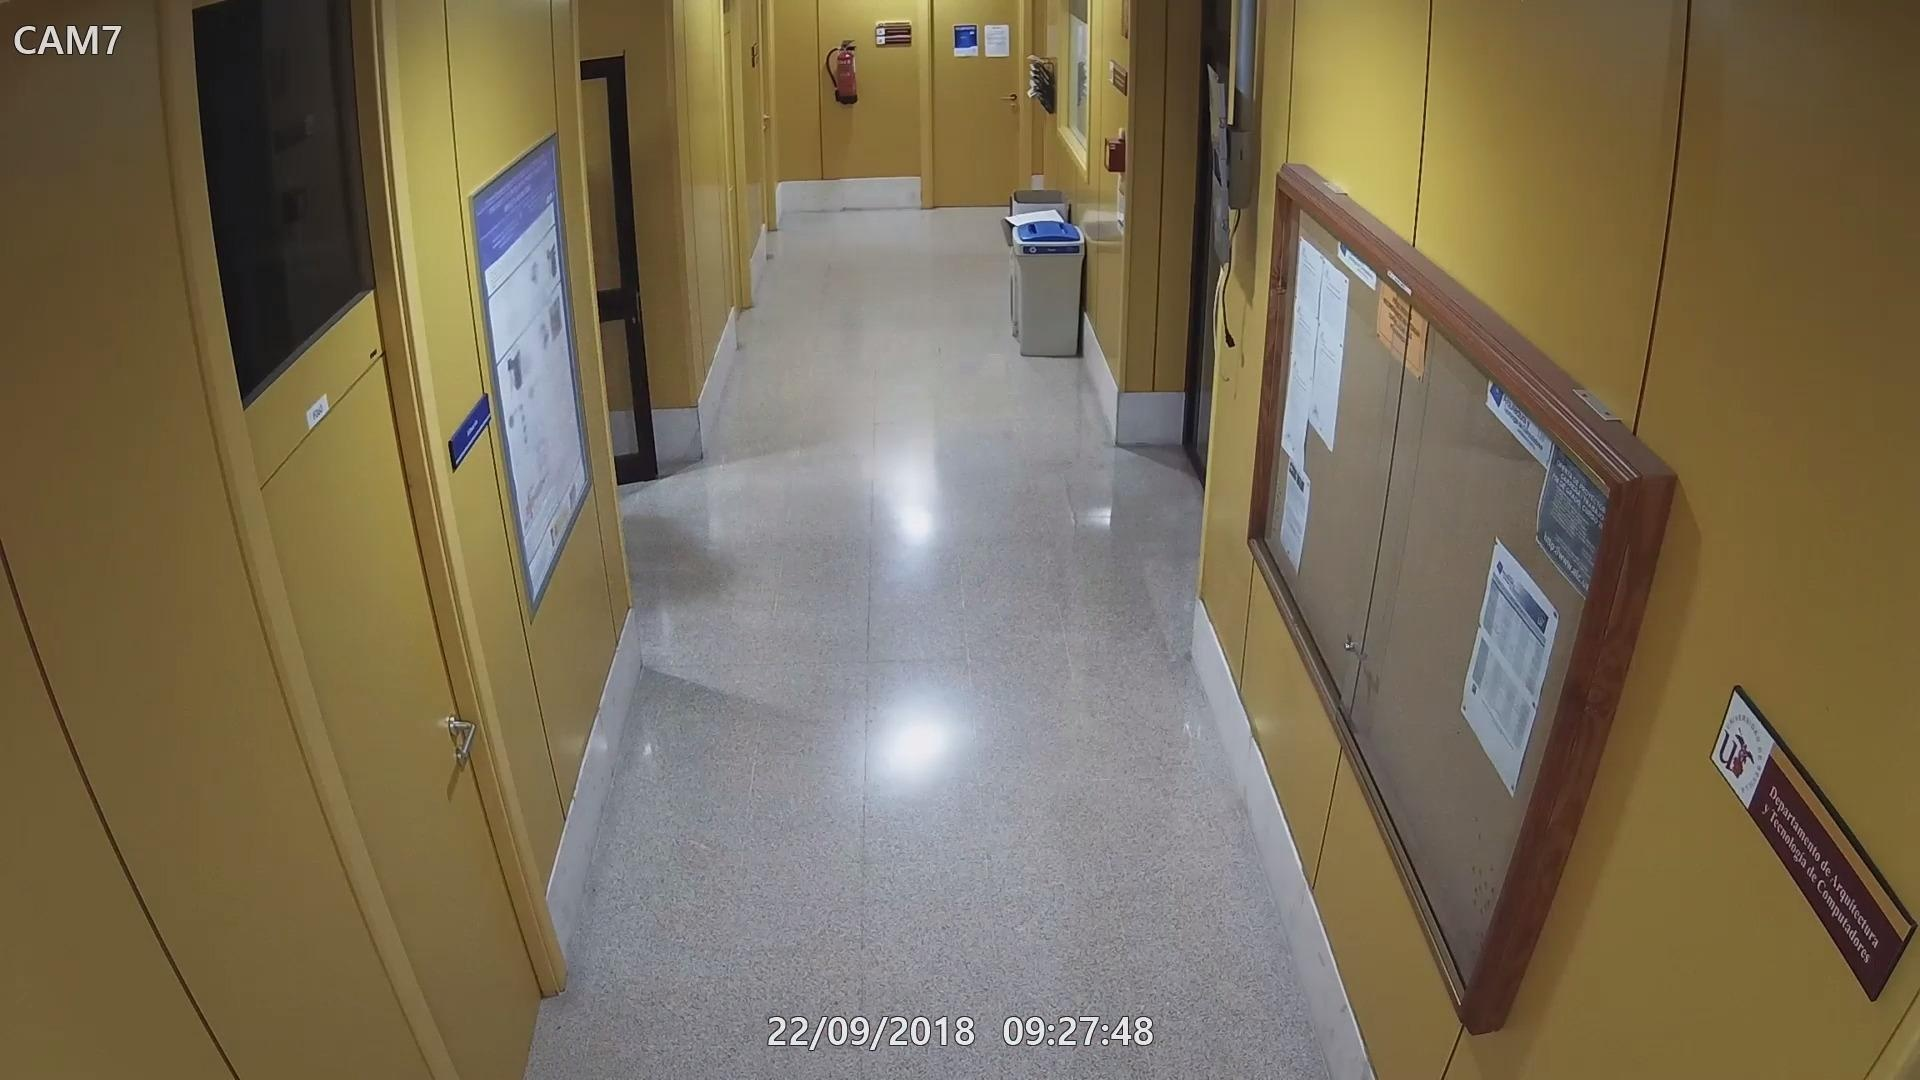

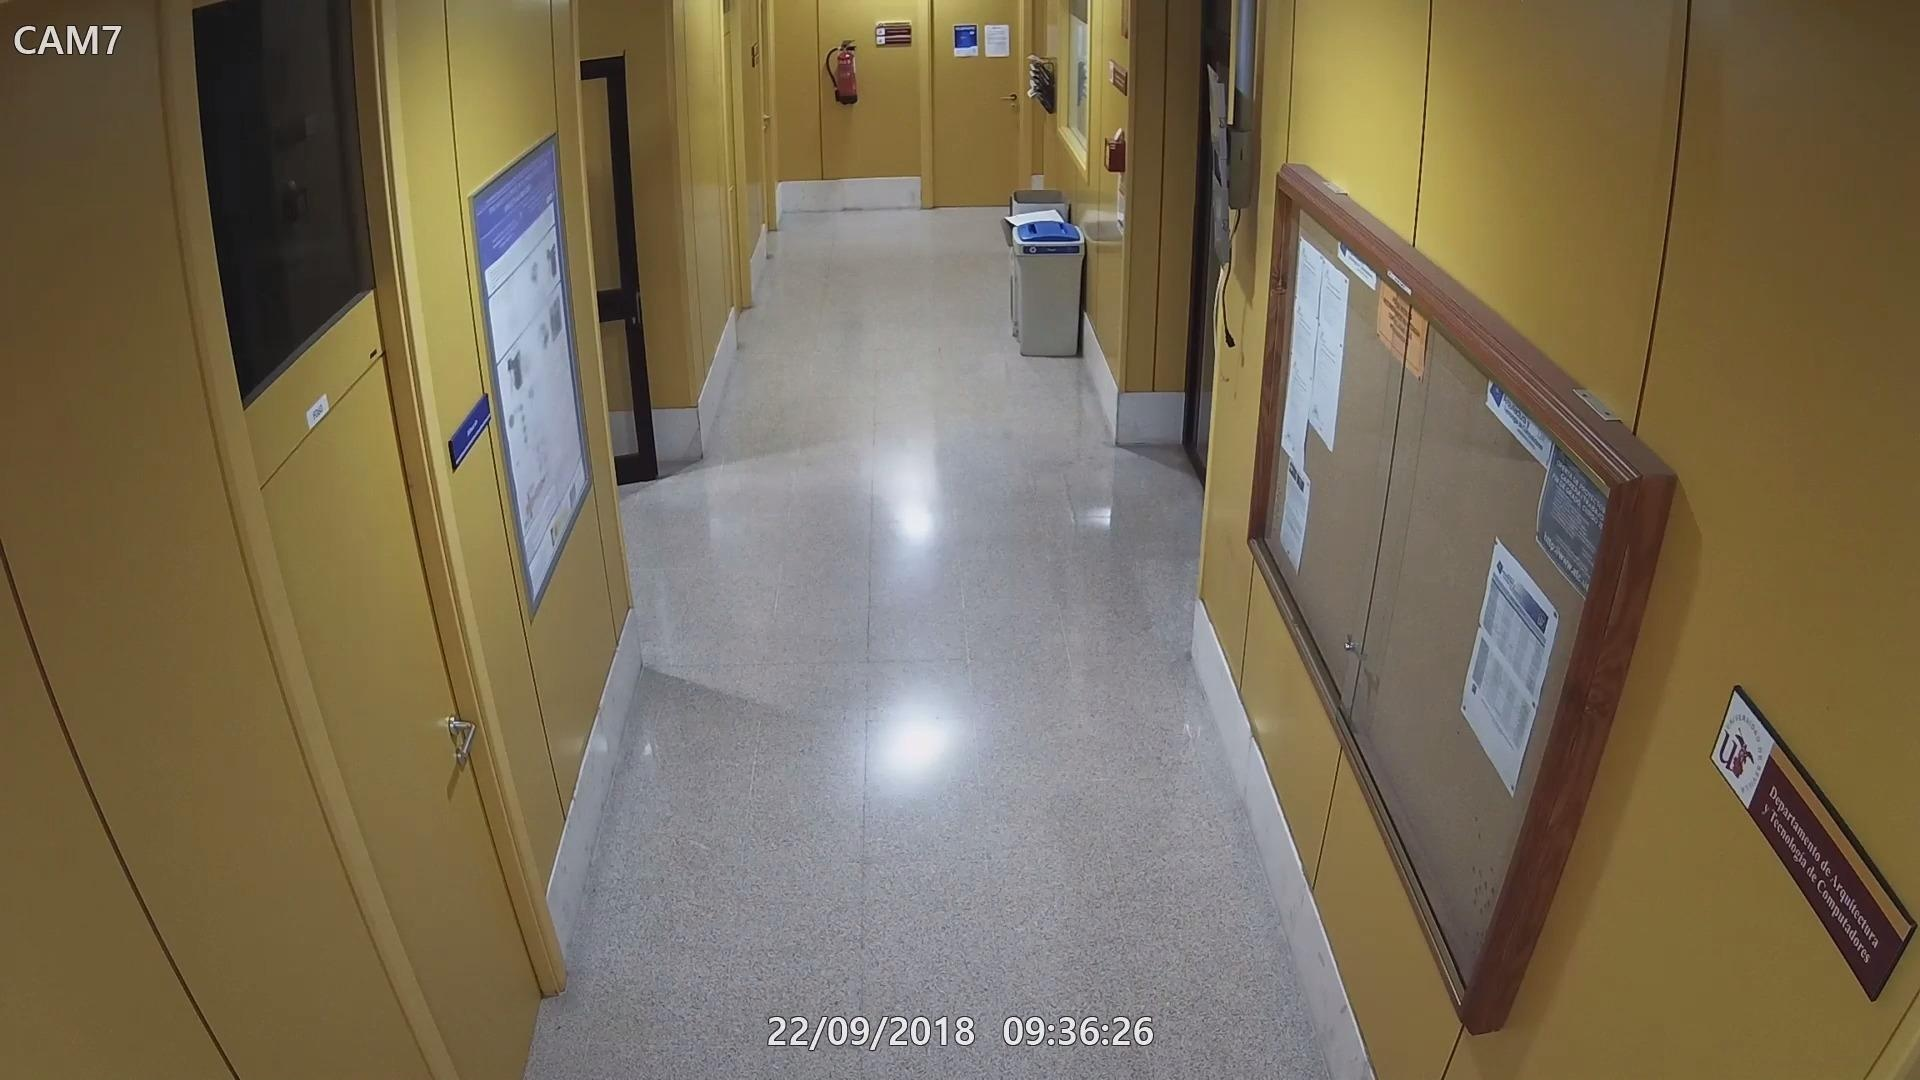

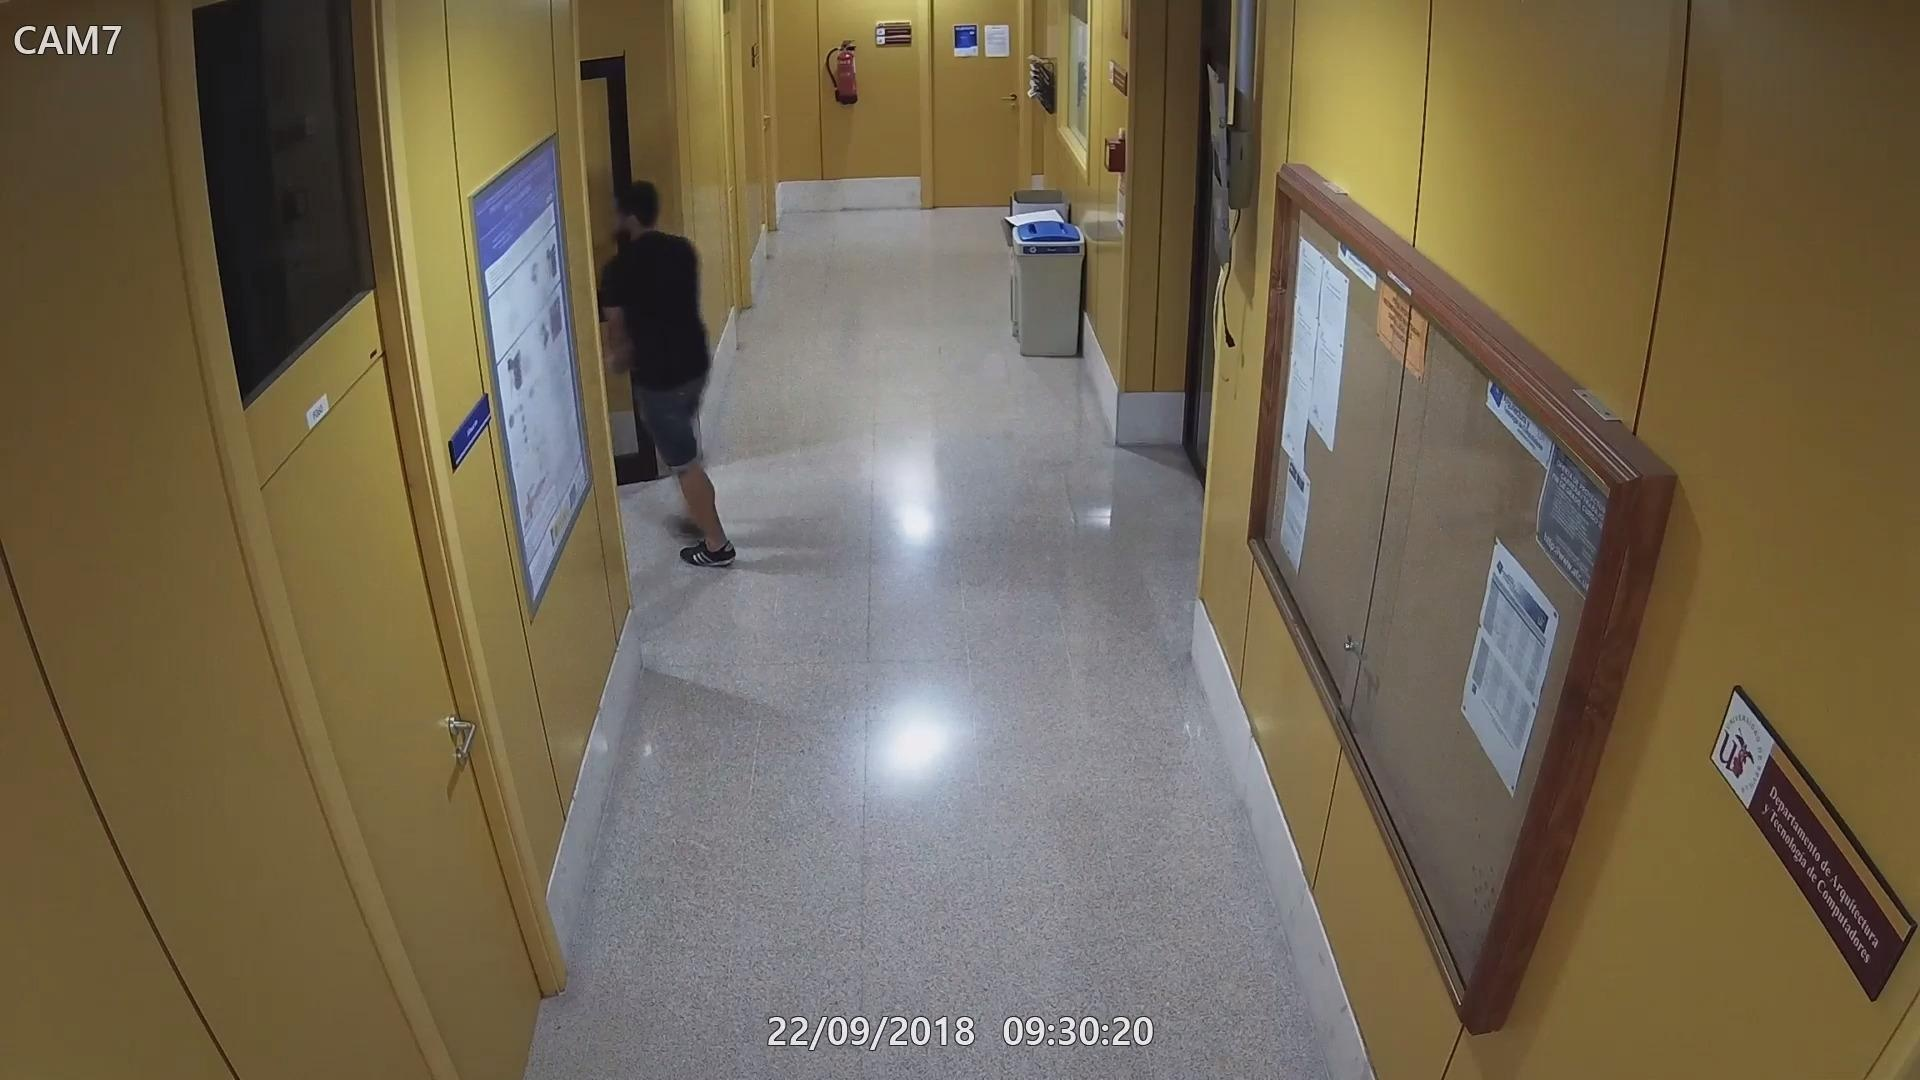

In [55]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict2*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[31:40]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [29]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/crime-detection-kguy9/crime-detection-ehs3x/1/uploadModel?api_key=c7H806AwcBQx20DaxDUR&modelType=yolov11&nocache=true
